In [1]:
pip install Basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 46.8 MB/s eta 0:00:00


In [2]:
!pip install basemap-data-hires
!pip install pandas
!pip install numpy
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 8.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
from IPython.display import HTML

In [ ]:
fig =plt.figure(figsize=(8, 8), dpi=100)
m = Basemap(projection='lcc',resolution='h',
            width = 7E6, height = 7E6,
            lat_0=21.433,lon_0=87.01)
m.etopo(scale=0.5,alpha=0.5)
m.bluemarble(scale=0.5)

x,y = m(77.20, 28.70)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'New Delhi')

x1,y1 = m(72.87, 19.07)
plt.plot(x1, y1, 'ok', markersize=5)
plt.text(x1, y1, 'mumbai')

x2,y2 = m(80.27, 13.08)
plt.plot(x2, y2, 'ok', markersize=5)
plt.text(x2, y2, 'chennai')

x3,y3 = m(77.059, 12.97)
plt.plot(x3, y3, 'ok', markersize=5)
plt.text(x3, y3, 'Bengaluru')

plt.title('Major Indian Airport Mapped and Geo-Referenced/Coordinated')
plt.savefig('plot.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,5), dpi=100)
ax = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(llcrnrlon=-10.,llcrnrlat=5.,urcrnrlon = 100.,urcrnrlat=60.,
            rsphere=(6378137.00, 6356752.31),
            resolution='h',projection='merc',
            lat_0=40.,lon_0=-20,lat_ts=20.0)

ndlat = 28.70; ndlon = 77.10
lonlat = 51.51; lonlon = 0.08

m.drawgreatcircle(ndlon,ndlat, lonlon,lonlat, linewidth=2, color='b')

x, y = m(0.08, 51.51)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'London')

x1, y1 = m(77.10, 28.70)
plt.plot(x1, y1, 'ok', markersize=5)
plt.text(x1, y1, 'New Delhi')

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary()
m.fillcontinents(color='green', lake_color='aqua')
m.drawparallels(np.arange(10,90,20), labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30), labels=[1,1,0,1])

ax.set_title('Flight Path from London to New Delhi')
plt.savefig('plot.png')
plt.show()

In [ ]:
from datetime import datetime

plt.figure(figsize=(10,5), dpi=100)
map = Basemap(projection='mill',lon_0=180)

map.drawcoastlines()
map.drawcountries()
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='green', lake_color='aqua')
map.drawparallels(np.arange(-90,90,30), labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60), labels=[0,0,0,1])


date = datetime.utcnow()

CS = map.nightshade(date)

plt.title('World Day/Night Map for %s (UTC) on Miller Cylindrical Projection'% date.strftime("%d %b %y %H:%M:%S"))

plt.savefig('plot.png')
plt.show()

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.animation import FuncAnimation


fig = plt.figure(figsize=(10,5), dpi=100)
ax = fig.add_axes([0.1,0.1,0.8,0.8])


m = Basemap(llcrnrlon=-10.,llcrnrlat=5.,urcrnrlon = 100.,urcrnrlat=60.,
            rsphere=(6378137.00, 6356752.31),
            resolution='l',projection='merc',
            lat_0=40.,lon_0=-20,lat_ts=20.0)

ndlat = 28.70; ndlon = 77.10
lonlat = 51.51; lonlon = 0.08

x, y = m(0.08, 51.51)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'London', fontsize=12)

x1, y1 = m(77.10, 28.70)
plt.plot(x1, y1, 'ok', markersize=5)
plt.text(x1, y1, 'New Delhi', fontsize=12)

num_points = 100

lon_interp = np.linspace(ndlon,lonlon,num_points)
lat_interp = np.linspace(ndlat, lonlat, num_points)

x_interp, y_interp = m(lon_interp, lat_interp)

plt.plot(x_interp, y_interp, 'b--', linewidth=2)

line, = plt.plot([], [], 'r--',linewidth=2)

flt_marker, = plt.plot([], [], 'k*', markersize = 10)


def init():
  line.set_data([], []);
  flt_marker.set_data([], []);
  return line, flt_marker;


def update(frame):
  line.set_data(x_interp[:frame], y_interp[:frame]);
  flt_marker.set_data(x_interp[frame], y_interp[frame]);
  return line, flt_marker;


  m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='green', lake_color='aqua')



m.drawparallels(np.arange(10,90,20), labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30), labels=[1,1,0,1])

ax.set_title('Flight Path from London to New Delhi')


ani = FuncAnimation(fig, update, frames=num_points, init_func = init,interval = 100, blit=True)

HTML(ani.to_jshtml())

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.animation import FuncAnimation


fig = plt.figure(figsize=(10,5), dpi=100)
ax = fig.add_axes([0.1,0.1,0.8,0.8])


m = Basemap(llcrnrlon=-10.,llcrnrlat=5.,urcrnrlon = 100.,urcrnrlat=60.,
            rsphere=(6378137.00, 6356752.31),
            resolution='l',projection='merc',
            lat_0=40.,lon_0=-20,lat_ts=20.0)

ndlat = 28.70; ndlon = 77.10
lonlat = 51.51; lonlon = 0.08

x, y = m(0.08, 51.51)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'London', fontsize=12)

x1, y1 = m(77.10, 28.70)
plt.plot(x1, y1, 'ok', markersize=5)
plt.text(x1, y1, 'New Delhi', fontsize=12)

num_points = 100

lon_interp = np.linspace(ndlon,lonlon,num_points)
lat_interp = np.linspace(ndlat, lonlat, num_points)

x_interp, y_interp = m(lon_interp, lat_interp)

plt.plot(x_interp, y_interp, 'b--', linewidth=2)

line, = plt.plot([], [], 'r--',linewidth=2)

flt_marker, = plt.plot([], [], 'k*', markersize = 10)


def init():
  line.set_data([], []);
  flt_marker.set_data([], []);
  return line, flt_marker;


def update(frame):
  line.set_data(x_interp[:frame], y_interp[:frame]);
  flt_marker.set_data(x_interp[frame], y_interp[frame]);
  return line, flt_marker;


m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='green', lake_color='aqua')



m.drawparallels(np.arange(10,90,20), labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30), labels=[1,1,0,1])

ax.set_title('Flight Path from London to New Delhi')


ani = FuncAnimation(fig, update, frames=num_points, init_func = init,interval = 100, blit=True)

HTML(ani.to_html5_video())
ani.save('flight_animation.gif', writer='kalash', fps=10)

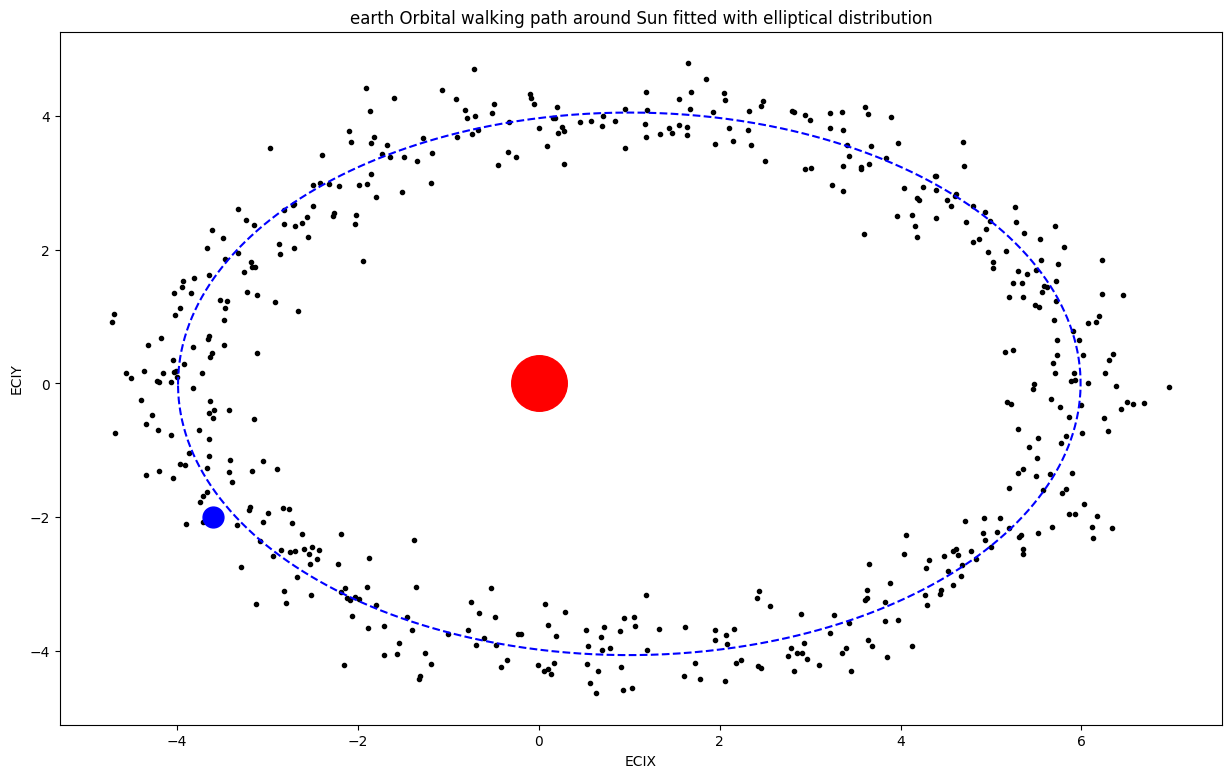

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize =(15,9))

N = 500

t = np.linspace(0,2*np.pi, N)

x = 5*np.cos(t) + 0.4*np.random.normal(size=N) + 1
y = 4*np.sin(t) + 0.4*np.random.normal(size=N)

plt.plot(x,y,'.k')

xmean, ymean = x.mean(), y.mean()
x -= xmean
y -= ymean

U,S,V = np.linalg.svd(np.stack((x,y)))

tt = np.linspace(0, 2*np.pi, 1000)
circle = np.stack((np.cos(tt), np.sin(tt)))
transform = np.sqrt(2/N) * U.dot(np.diag(S))
fit = transform.dot(circle) + np.array([[xmean],[ymean]])
plt.plot(fit[0,:], fit[1,:], '--b')
plt.plot(0,0, 'or', markersize=40)
plt.plot(-3.6,-2, 'ob', markersize=15)

plt.title("earth Orbital walking path around Sun fitted with elliptical distribution")
plt.xlabel('ECIX')
plt.ylabel('ECIY')
plt.show()